# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1:Yarden 7610
# student 2: Yonatan 1333

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
#IMPORT MODULES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score, make_scorer,accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB  

# show several outputs in one cell. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 2.1) Load Dataset

In [3]:
#loading the dataset
df_train = pd.read_csv('cancer_train.csv')
df_test = pd.read_csv('cancer_test.csv')

#presenting 5 first rows for each dataset
df_train.head()
df_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1


### 2.2) EDA - Visualization 

In [4]:
#statistics of the data
df_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.257910,19.482835,92.876220,668.580440,0.096224,0.105452,0.090853,0.050013,0.181970,0.062671,...,25.905626,108.558462,903.095165,0.132501,0.257053,0.276415,0.116064,0.290950,0.083924,0.608791
std,3.613344,4.261633,24.922646,364.587131,0.013793,0.053892,0.081118,0.039727,0.027895,0.006930,...,6.149887,34.615237,594.101449,0.022603,0.159287,0.208508,0.065882,0.061539,0.018236,0.488558
min,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,12.490000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.725000,16.390000,75.265000,422.300000,0.086210,0.065600,0.029700,0.020610,0.162000,0.057660,...,21.355000,84.405000,516.450000,0.116200,0.147750,0.115450,0.065280,0.251000,0.071250,0.000000
50%,13.460000,19.020000,87.160000,559.200000,0.095090,0.094530,0.063350,0.033340,0.179400,0.061400,...,25.500000,97.670000,697.700000,0.131200,0.216700,0.232200,0.101200,0.282200,0.079480,1.000000
75%,16.150000,21.960000,106.850000,807.450000,0.105000,0.130150,0.134150,0.077440,0.195950,0.066180,...,30.285000,127.750000,1151.500000,0.146400,0.341600,0.385300,0.161950,0.319600,0.092130,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.095750,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.577400,0.207500,1.000000


In [5]:
#counts of unique values in the 'target' column as a DataFrame
print(df_train['target'].value_counts().reset_index(name='total count').to_string(index=False))

 target  total count
      1          277
      0          178


In [6]:
#pearson colleration table
corr_matrix = df_train.corr()
corr_matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.330176,0.997812,0.987056,0.195649,0.514033,0.683633,0.827841,0.131289,-0.305680,...,0.298954,0.966303,0.942508,0.126920,0.413766,0.532913,0.752861,0.166321,0.004476,-0.736235
mean texture,0.330176,1.000000,0.335491,0.325631,-0.015465,0.244415,0.302424,0.299075,0.090179,-0.080698,...,0.909713,0.365123,0.349017,0.096957,0.291774,0.316971,0.309796,0.127515,0.134771,-0.423501
mean perimeter,0.997812,0.335491,1.000000,0.985927,0.232382,0.565419,0.723114,0.856114,0.167106,-0.254581,...,0.305249,0.971500,0.942718,0.157259,0.456450,0.570061,0.779325,0.191043,0.048136,-0.748229
mean area,0.987056,0.325631,0.985927,1.000000,0.199771,0.503170,0.690029,0.826788,0.132359,-0.279031,...,0.289371,0.960513,0.961482,0.129290,0.388384,0.514545,0.728709,0.141951,-0.001031,-0.710551
mean smoothness,0.195649,-0.015465,0.232382,0.199771,1.000000,0.649566,0.538440,0.562378,0.529308,0.559353,...,0.045694,0.256183,0.221652,0.792562,0.468144,0.449874,0.500693,0.352148,0.474042,-0.364625
mean compactness,0.514033,0.244415,0.565419,0.503170,0.649566,1.000000,0.891203,0.831064,0.591602,0.557543,...,0.260141,0.595717,0.511571,0.550977,0.863971,0.827262,0.812736,0.488193,0.669436,-0.598842
mean concavity,0.683633,0.302424,0.723114,0.690029,0.538440,0.891203,1.000000,0.924774,0.488744,0.345740,...,0.305087,0.734641,0.680204,0.444002,0.751539,0.875238,0.856514,0.390728,0.505129,-0.693962
mean concave points,0.827841,0.299075,0.856114,0.826788,0.562378,0.831064,0.924774,1.000000,0.443347,0.164817,...,0.299000,0.858829,0.812203,0.441690,0.657893,0.752032,0.906676,0.356942,0.349718,-0.774512
mean symmetry,0.131289,0.090179,0.167106,0.132359,0.529308,0.591602,0.488744,0.443347,1.000000,0.488818,...,0.117801,0.203281,0.158815,0.391444,0.462537,0.423280,0.406707,0.697763,0.428051,-0.306804
mean fractal dimension,-0.305680,-0.080698,-0.254581,-0.279031,0.559353,0.557543,0.345740,0.164817,0.488818,1.000000,...,-0.040741,-0.199800,-0.229273,0.498163,0.458173,0.358466,0.168302,0.305796,0.763657,0.019859


<Figure size 1800x1800 with 0 Axes>

<Axes: >

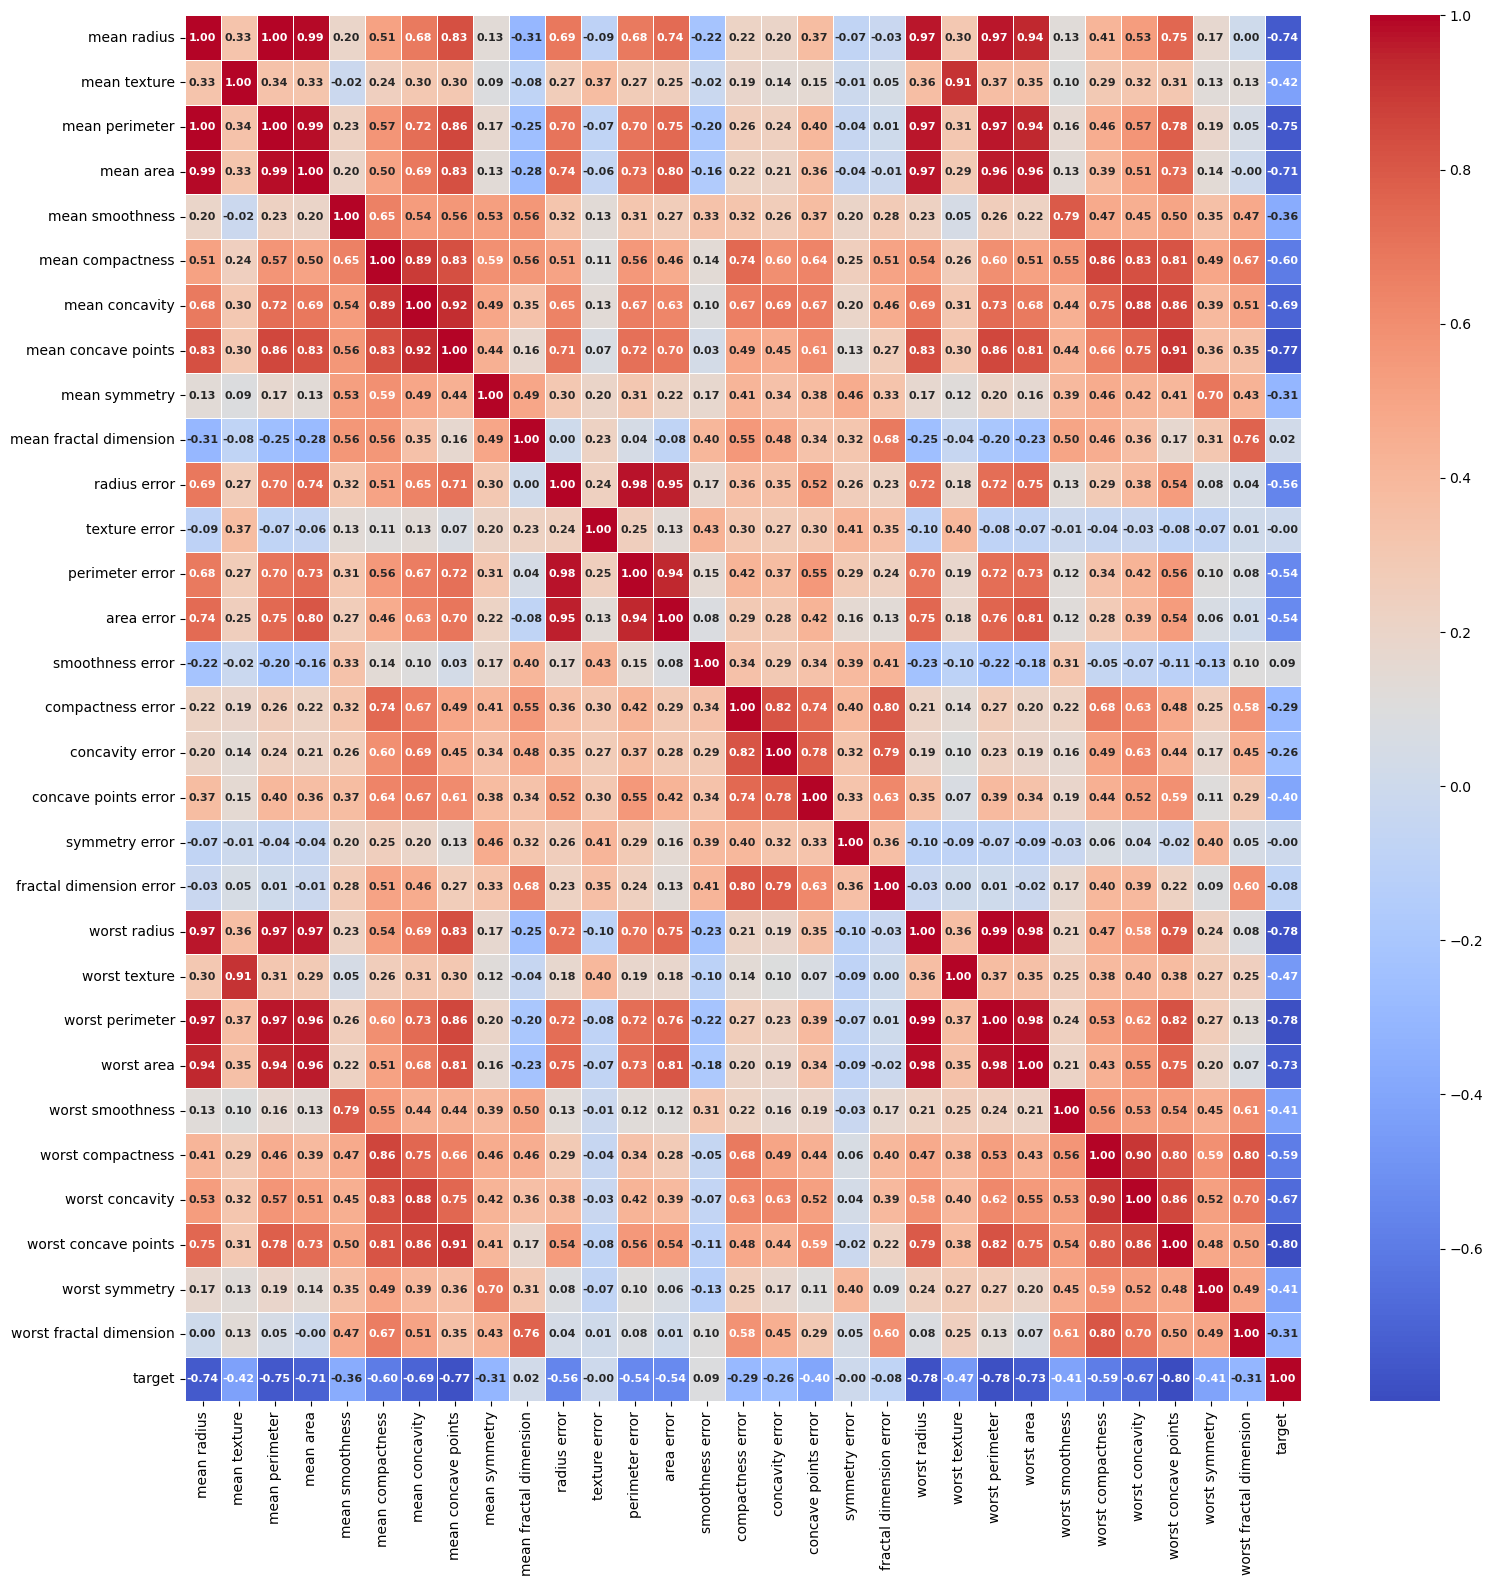

In [7]:
#heatmap of all the features - curralation between the features
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize": 8,"weight": "bold"}, linewidths=.5,cmap="coolwarm", fmt='.2f')
plt.show()

<Figure size 600x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x26ce5893290>,
 [Text(-0.3686787860721373, 1.0363763566872681, 'Bengin'),
  Text(0.36867888310469266, -1.0363763221690645, 'Malignant')],
 [Text(-0.2010975196757112, 0.5652961945566916, '60.9%'),
  Text(0.20109757260255962, -0.5652961757285806, '39.1%')])

Text(0.5, 1.0, 'Distribution of Target Classes')

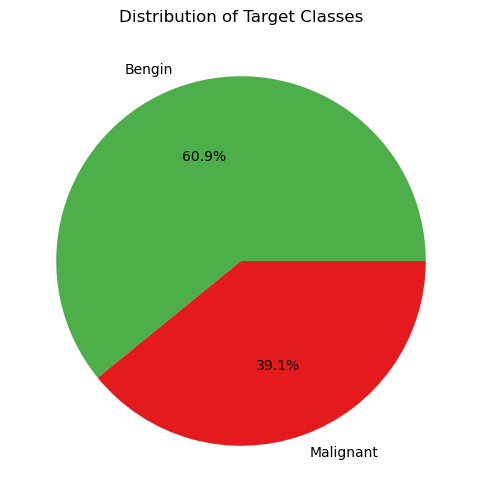

In [8]:
# Calculate the distribution of each class
target_counts = df_train['target'].value_counts()
target_labels = ["Bengin","Malignant"]

# Create the pie plot
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_labels, autopct='%1.1f%%', colors=['#4daf4a','#e41a1c'])
plt.title('Distribution of Target Classes')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

### 5-fold-cross validation with Grid search 

In [12]:
X_train = df_train.drop(columns=['target'])
y_train = df_train['target']
#define the models and the hyper parameters
classifiers = {
    'Decision Tree': (DecisionTreeClassifier(), {'classifier__max_depth': [None, 3, 10, 20, 30], 'classifier__criterion': ['entropy', 'gini']}),
    'Logistic Regression': (LogisticRegression(), {'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__solver': ['liblinear'], 'classifier__max_iter': [100, 500, 2000]}),
    'Naive Bayes': (GaussianNB(), {}),
    'SVM': (SVC(), {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear']})
}

#define the feature engineering
feature_engineering = {
    'No Scaling': FunctionTransformer(),
    'Standard Scaling': StandardScaler(),
    'Min-Max Scaling': MinMaxScaler(),
    'PCA': PCA(n_components=0.96),  
}


f1_scorer = make_scorer(f1_score, average='binary')

results = {'Model': [], 'Feature Engineering': [], 'Best Params': [], 'Best F1 Score': []}

for fe_name, fe_transformer in feature_engineering.items():
    for name, (model, params) in classifiers.items():
        pipeline = Pipeline([
            ('feature_engineering', fe_transformer),
            ('classifier', model)
        ])
        grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring=f1_scorer)
        grid_search = grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        results['Model'].append(name)
        results['Feature Engineering'].append(fe_name)
        results['Best Params'].append(grid_search.best_params_)
        results['Best F1 Score'].append(cross_val_score(best_model, X_train, y_train, cv=5, scoring=f1_scorer).mean())

results_df = pd.DataFrame(results)
print("\nComparison of Results:")
results_df

best_model_name = results_df.loc[results_df['Best F1 Score'].idxmax()]['Model']
best_feature_eng = results_df.loc[results_df['Best F1 Score'].idxmax()]['Feature Engineering']
best_model_params = results_df.loc[results_df['Best F1 Score'].idxmax()]['Best Params']
print(f"\nBest Model: {best_model_name} with {best_feature_eng}")
print(f"Best Model Parameters: {best_model_params}")
print(f"Best Model F1 Score: {results_df['Best F1 Score'].max():.2f}")


Comparison of Results:


,Model,Feature Engineering,Best Params,Best F1 Score
0,Decision Tree,No Scaling,"{'classifier__criterion': 'entropy', 'classifi...",0.938091
1,Logistic Regression,No Scaling,"{'classifier__C': 100, 'classifier__max_iter':...",0.967659
2,Naive Bayes,No Scaling,{},0.947094
3,SVM,No Scaling,"{'classifier__C': 1, 'classifier__kernel': 'li...",0.962603
4,Decision Tree,Standard Scaling,"{'classifier__criterion': 'entropy', 'classifi...",0.943619
5,Logistic Regression,Standard Scaling,"{'classifier__C': 0.1, 'classifier__max_iter':...",0.980433
6,Naive Bayes,Standard Scaling,{},0.942581
7,SVM,Standard Scaling,"{'classifier__C': 0.1, 'classifier__kernel': '...",0.982173
8,Decision Tree,Min-Max Scaling,"{'classifier__criterion': 'entropy', 'classifi...",0.939902
9,Logistic Regression,Min-Max Scaling,"{'classifier__C': 100, 'classifier__max_iter':...",0.975025



Best Model: SVM with Standard Scaling
Best Model Parameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Best Model F1 Score: 0.98


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [10]:
#clean the parameters
best_model_params_clean = {key.replace('classifier__', ''): value for key, value in best_model_params.items()}
#set the best feature engineering 
scaler = feature_engineering[best_feature_eng]
X_train_scaled = scaler.fit_transform(X_train)
#set the best model
model = classifiers[best_model_name][0]
model = model.set_params(**best_model_params_clean)
model.fit(X_train_scaled, y_train)

SVC(C=0.1, kernel='linear')

## Part 5 - Apply on test and show model performance estimation

In [11]:
#apply the model on the test
X_test_scaled = scaler.transform(df_test.drop(columns=['target']))
test_preds = model.predict(X_test_scaled)
y_test = df_test['target']

#model performance estimation
accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)

#insert the data Into Dataframe
test_results = pd.DataFrame({
    'True Label': df_test['target'].values[:5],  
    'Predicted Label': test_preds[:5]  
})

performance_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

print("First 5 Predictions on Test Data:")
test_results

print("\nModel Performance Metrics:")
performance_metrics

First 5 Predictions on Test Data:


,True Label,Predicted Label
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1



Model Performance Metrics:


,Metric,Score
0,Accuracy,0.982456
1,Precision,0.987500
2,Recall,0.987500
3,F1 Score,0.987500
